In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, metrics, svm
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt,matplotlib.image as mpimg
from sklearn import svm




from sklearn.svm import SVC
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
mnist_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_train.shape

(42000, 785)

In [5]:
l=mnist_train['label']
l.shape

(42000,)

In [6]:
d=mnist_train.drop("label",axis=1)

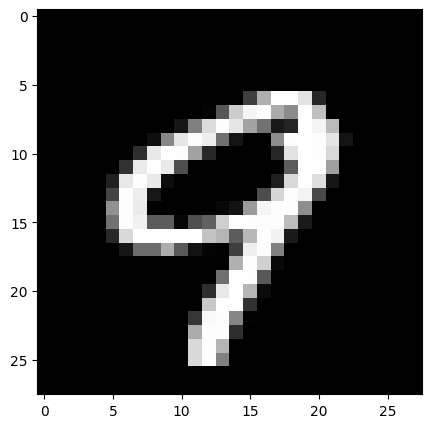

9


In [7]:
plt.figure(figsize=(5,5))
idx=100
grid_data=d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data,cmap="gray")
plt.show()
print(l[idx])


In [8]:
label = l.head(15000)
data=d.head(15000)
data.shape

(15000, 784)

In [9]:
from sklearn.preprocessing import StandardScaler
standard_data = StandardScaler().fit_transform(data)
standard_data.shape

(15000, 784)

In [10]:
sample_data = standard_data
covar_mat=np.matmul(sample_data.T,sample_data)
covar_mat.shape

(784, 784)

In [11]:
from scipy.linalg import eigh
values,vectors = eigh(covar_mat,eigvals=(782,783))
vectors.shape
values

array([435532.55785282, 605719.29173629])

In [12]:
vector = vectors.T


In [13]:
vector[[0,1]]=vector[[1,0]]

import matplotlib.pyplot as plt
new_coor=np.matmul(vector,sample_data.T)


In [14]:
new_coor = np.vstack((new_coor,label)).T
dataframe = pd.DataFrame(data=new_coor,columns=("1st_principal","2nd_principal","label"))
dataframe.head()

,1st_principal,2nd_principal,label
0,-5.043558,-5.558661,1.0
1,19.305278,6.193635,0.0
2,-7.678775,-1.909878,1.0
3,-0.464845,5.525748,4.0
4,26.644289,6.366527,0.0


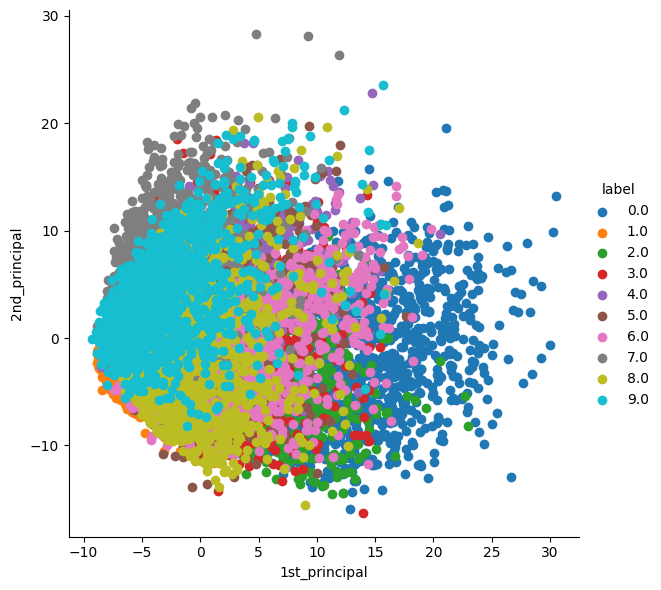

In [15]:
import seaborn as sns
sns.FacetGrid(dataframe,hue="label",height=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()
plt.show()

**PCA for dimensionality reduction(not for visualisation)**

In [16]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)

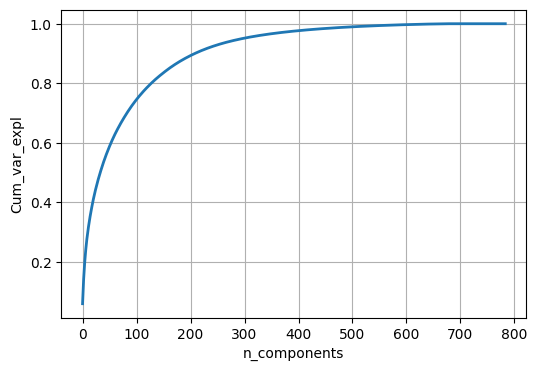

In [17]:
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cum_var_expl')
plt.show()

**t-SNE**

In [18]:
from sklearn.manifold import TSNE
data_1000=standard_data[0:1000,:]
labels_1000 = label[0:1000]

In [19]:
model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data_1000)

In [20]:
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("dim_1","dim_2","label"))

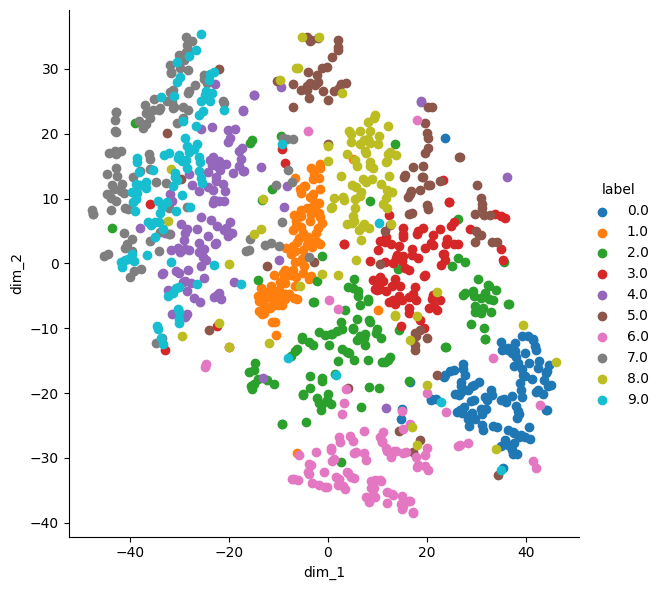

In [21]:
sns.FacetGrid(tsne_df,hue="label",height=6).map(plt.scatter,"dim_1","dim_2").add_legend()
plt.show()

In [22]:
full_images=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
images = full_images.iloc[0:5000,1:]
labels = full_images.iloc[0:5000,:1]
X_train,X_test,y_train,y_test = train_test_split(images,labels,train_size=0.8,random_state=0)

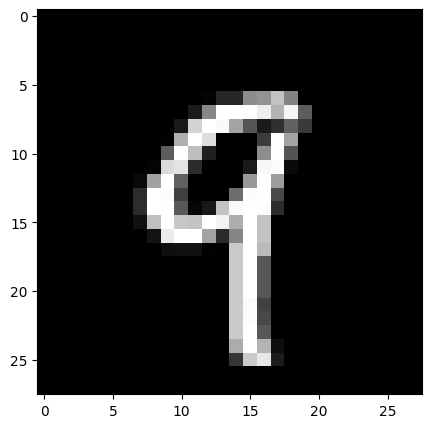

9

In [23]:
plt.figure(figsize=(5,5))
idx=100
grid_data = X_train.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data,cmap='gray')
plt.show()
l[idx]

In [24]:
from sklearn.model_selection import GridSearchCV


params = {
    'C':[1e-4,0.001,0.01,0.1,1,10]
}


svc = SVC(kernel='linear')
clf = GridSearchCV(svc,params,scoring="accuracy",cv=3)
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [25]:
res=clf.cv_results_
for i in range(len(res["params"])):
    print(f"Parameters :{res['params'][i]} MEAN_SCORE:{res['mean_test_score'][i]} Rank:{res['rank_test_score'][i]}")

Parameters :{'C': 0.0001} MEAN_SCORE:0.9135008639716151 Rank:1
Parameters :{'C': 0.001} MEAN_SCORE:0.9135008639716151 Rank:1
Parameters :{'C': 0.01} MEAN_SCORE:0.9135008639716151 Rank:1
Parameters :{'C': 0.1} MEAN_SCORE:0.9135008639716151 Rank:1
Parameters :{'C': 1} MEAN_SCORE:0.9135008639716151 Rank:1
Parameters :{'C': 10} MEAN_SCORE:0.9135008639716151 Rank:1


In [26]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.91

In [27]:
clf = svm.SVC()
clf.fit(X_train,y_train.values.ravel())
clf.score(X_test,y_test)

0.942

In [28]:
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
final_predictions=clf.predict(test_data)
final_predictions

array([2, 0, 9, ..., 3, 9, 2])

In [29]:
predictions_df = pd.DataFrame({
    "ImageId": range(1, len(final_predictions) + 1),
    "Label": final_predictions
})

# Save the predictions to a CSV file
predictions_df.to_csv('/kaggle/working/submission.csv', index=False)